In [105]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [106]:
X,y = make_blobs(n_samples=500, n_features=2, centers=5,random_state=3)

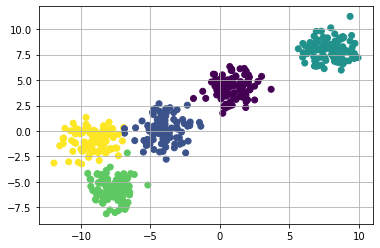

In [107]:
plt.scatter(X[:,0] , X[:,1] , c = y)
plt.grid("True")
plt.show()

# clusters

In [192]:
k = 5
clusters = {}
color = ["green" , "red" , "blue" , "yellow" , "orange"]
for i in range(k):
    center = 10*(2*np.random.random((2, )) - 1)
    points = [ ]
    cluster = { 'center': center,
                'points': points,
                'color' : color[i]}
    clusters[i] = cluster

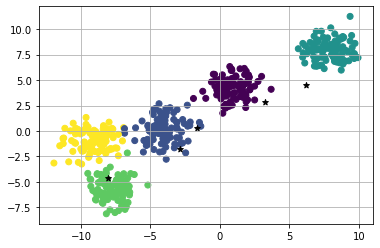

In [193]:
plt.scatter(X[:,0] , X[:,1] , c = y)
for i in range(k):
    cluster_center = clusters[i]['center']
    plt.scatter(cluster_center[0],cluster_center[1],marker="*",color = "black")
plt.grid("True")
plt.show()

In [194]:
clusters

{0: {'center': array([-1.65688371,  0.30892766]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-8.08084259, -4.61548515]),
  'points': [],
  'color': 'red'},
 2: {'center': array([3.25768032, 2.79985409]), 'points': [], 'color': 'blue'},
 3: {'center': array([-2.88207313, -1.72972187]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([6.18591667, 4.54460465]),
  'points': [],
  'color': 'orange'}}

# distance

In [195]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2)) #diatnce = sqrt((x1-x2)**2 + (y1-y2)**2)

In [196]:
a=np.array([1,2])
b=np.array([3,4])
print(distance(a,b))

2.8284271247461903


In [197]:
def assignpointtoclusters(clusters):
    for i in range(X.shape[0]):
        curr_x = X[i]
        dist = []
        for kx in range(k):
            d = distance(curr_x , clusters[kx]['center'])
            dist.append(d)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)

In [198]:
assignpointtoclusters(clusters)

In [199]:
clusters

{0: {'center': array([-1.65688371,  0.30892766]),
  'points': [array([-0.22816528,  3.53653954]),
   array([-4.45650534,  0.65156136]),
   array([-3.32794185,  1.80341865]),
   array([-3.95050446,  1.40935727]),
   array([-3.08725214,  0.85624446]),
   array([-4.83916271,  1.83598291]),
   array([-4.34960382,  1.9392213 ]),
   array([-3.09249567,  0.24047413]),
   array([-4.09285185,  0.99544901]),
   array([-4.64175137,  2.20728992]),
   array([-4.38019548,  2.67413973]),
   array([-3.94549963,  1.03215657]),
   array([-2.67864327,  1.12487082]),
   array([-1.37002685,  0.46854723]),
   array([-4.4192427 ,  1.10189178]),
   array([-4.51148337,  1.11370185]),
   array([-1.46997889,  0.84402599]),
   array([-2.16225458,  0.54281438]),
   array([-2.13557245,  0.88353995]),
   array([-3.8942215 ,  2.18302673]),
   array([-2.34275333,  2.5324107 ]),
   array([-1.0144355 ,  3.20218134]),
   array([-3.32054761,  1.13556023]),
   array([-1.23229972,  3.89519459]),
   array([-2.32109355,  0.47

## plot clusters and points

In [200]:
def plot_clusters(clusters):
    k=5
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
       # print(pts)
        try :
            plt.scatter(pts[:,0] , pts[:,1] )#, color = clusters[kx]['color'])
        except:
            pass
        #plot cluster
        uk = clusters[kx]['center']
        plt.scatter(uk[0] , uk[1] , marker = "*" , color = "black")

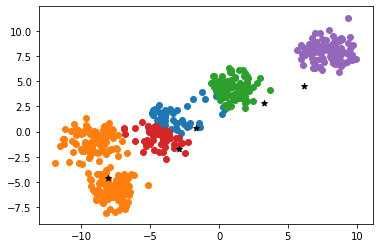

In [201]:
plot_clusters(clusters)

In [202]:
def updateclusters(clusters):
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0] > 0:
            new_u = pts.mean(axis = 0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = []

In [203]:
updateclusters(clusters)

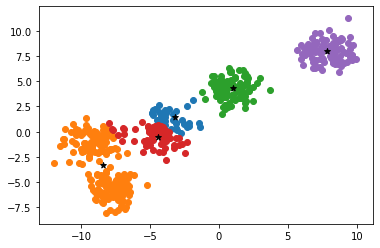

In [204]:
assignpointtoclusters(clusters)
plot_clusters(clusters)

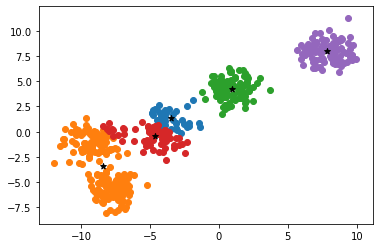

In [205]:
updateclusters(clusters)
assignpointtoclusters(clusters)
plot_clusters(clusters)

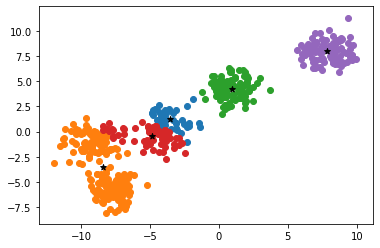

In [206]:
updateclusters(clusters)
assignpointtoclusters(clusters)
plot_clusters(clusters)

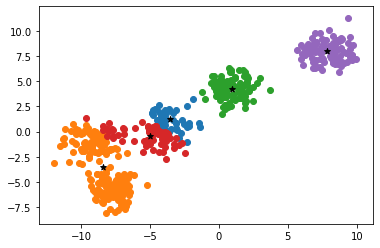

In [207]:
updateclusters(clusters)
assignpointtoclusters(clusters)
plot_clusters(clusters)

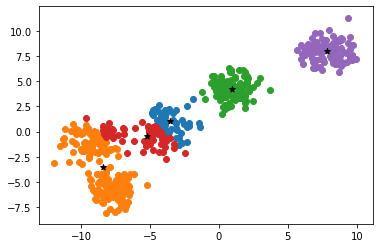

In [208]:
updateclusters(clusters)
assignpointtoclusters(clusters)
plot_clusters(clusters)

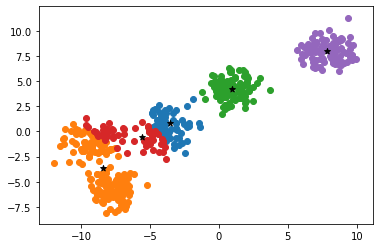

In [209]:
updateclusters(clusters)
assignpointtoclusters(clusters)
plot_clusters(clusters)

## KMEANS USING SKI-KIT lEARN

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

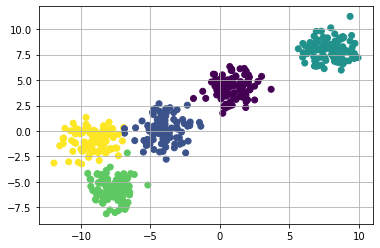

In [215]:
X,y = make_blobs(n_samples=500, n_features=2, centers=5,random_state=3)
plt.scatter(X[:,0] , X[:,1] , c = y)
plt.grid("True")
plt.show()

In [216]:
kmeans = KMeans(n_clusters=5)

In [217]:
kmeans.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [219]:
center = kmeans.cluster_centers_
print(center)

[[ 7.8649674   7.97988109]
 [-9.0671623  -0.96740759]
 [ 0.88641907  4.19441853]
 [-7.6726196  -5.69211059]
 [-3.97953526  0.19458336]]


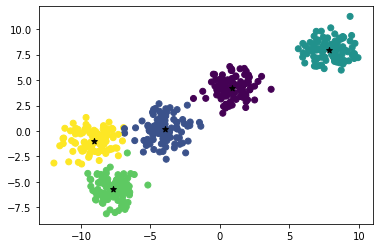

In [222]:
plt.scatter(X[:,0] , X[:,1] , c = y)
plt.scatter(center[:,0],center[:,1],marker="*",color = "black")
plt.show()

In [224]:
pred = kmeans.labels_
print(pred)

[3 0 4 3 3 4 1 3 0 3 0 4 0 3 4 3 0 3 3 0 2 2 3 4 3 2 1 1 4 1 3 1 2 2 3 2 0
 0 3 2 2 2 1 1 4 0 0 1 1 1 0 3 1 3 3 2 3 3 0 4 0 4 4 3 1 0 4 4 2 4 2 3 2 3
 2 4 3 1 2 2 4 2 4 1 0 1 4 0 1 4 1 2 3 2 2 0 3 4 4 2 0 2 4 4 0 0 0 4 4 3 0
 1 3 0 4 2 0 1 2 4 0 4 1 3 2 1 1 1 3 3 4 4 3 0 0 1 4 1 4 3 3 2 4 0 1 3 0 0
 3 4 3 3 4 4 0 2 2 1 4 3 2 0 1 2 0 2 0 2 2 2 1 3 2 0 2 1 3 4 0 1 0 3 0 2 1
 1 2 3 4 0 2 4 1 3 1 2 4 1 3 3 3 2 2 0 3 1 1 3 0 3 3 3 2 0 4 0 3 3 0 1 4 1
 1 2 3 4 3 4 1 2 4 4 3 2 3 2 4 0 4 2 2 0 3 3 4 4 2 0 2 3 1 0 1 3 1 1 1 1 0
 2 0 3 2 0 1 4 0 0 0 1 3 3 4 2 2 0 4 4 3 4 1 4 0 0 1 1 2 1 1 0 2 3 4 2 4 1
 4 4 0 3 2 0 2 2 3 1 2 4 2 1 3 3 4 0 2 1 0 2 4 1 0 1 3 2 1 4 4 2 2 2 3 1 2
 3 0 4 4 1 0 0 4 4 1 2 2 2 3 1 0 1 3 2 0 0 4 2 2 1 2 1 4 4 4 1 2 3 2 4 1 1
 0 3 0 1 3 1 4 0 2 0 4 3 3 0 0 2 0 2 1 4 0 1 3 3 0 4 2 1 3 3 3 1 0 2 0 0 0
 1 2 4 0 4 4 1 4 3 4 3 0 2 2 3 0 1 3 2 4 0 1 4 1 1 0 1 4 1 0 1 4 1 3 2 2 1
 2 0 2 2 1 3 3 4 1 2 4 1 4 0 4 0 3 2 4 3 4 3 3 2 3 2 1 0 0 4 3 3 1 1 0 1 1
 0 1 0 0 0 1 2 1 4 0 4 4 

# kmeans can fails

In [228]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

In [231]:
X,y = make_moons(n_samples = 200 , noise=0.1)

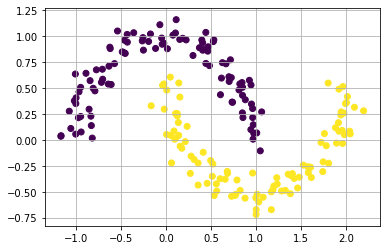

In [232]:
plt.scatter(X[:,0] , X[:,1] , c = y)
plt.grid("True")
plt.show()

In [233]:
kmeans = KMeans(n_clusters=2)

In [234]:
kmeans.fit(X,y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [235]:
center = kmeans.cluster_centers_

In [237]:
labels = kmeans.labels_

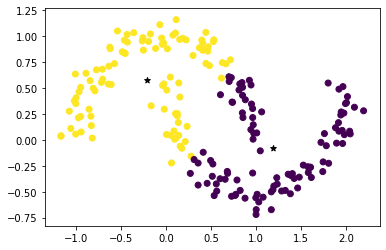

In [239]:
plt.scatter(X[:,0] , X[:,1] , c = labels)
plt.scatter(center[:,0],center[:,1],marker="*",color = "black")
plt.show()

# DBSCAN

In [266]:
from sklearn.cluster import DBSCAN
dbc = DBSCAN(eps=0.15, min_samples=5)


In [267]:
dbc.fit(X)
labels = dbc.fit_predict(X)


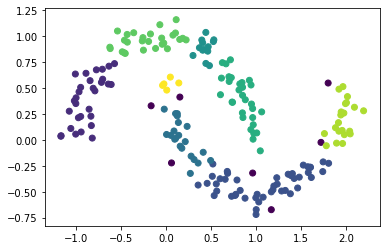

In [268]:
plt.scatter(X[:,0] , X[:,1] , c = labels)